<a href="https://colab.research.google.com/github/thedataninja1786/Data-Science/blob/main/ARIMA_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##SIMPLE ARIMA MODEL CODED FROM SCRATCH##



In [13]:
# Import files and read data
import matplotlib.pyplot as plt
import random

with open('/content/drive/MyDrive/monthly-sunspots.txt','r') as f:
  data = f.readlines()

dates = []
values = []

for row in data[1:]:
  element  = row.split()[0]
  dates.append(element.split(',')[0].strip('"'))
  values.append(float(element.split(',')[1].strip("''")))

In [14]:
# Create a function that generates regressions based on the number of lags
# Hence create a function that generates the lags 

def AutoRegression(data:list,lags:int, lr:float):
  '''
  Generates the autoregression of the data based on the number of specified lags
  '''
  random.seed(0)
  # Add an extra 2 on the number of lags to compensate for creating the Y 
  # data and because index starts at position 1
  
  lags = lags + 2 
  dataset = []
  for z,j in enumerate(range(lags,1,-1)):
    z = z + 1 
    helper = []
    for i in range(z,len(values) - j):
      helper.append(values[i])
    dataset.append(helper)

  Y = dataset[-1]
  X = dataset[:len(dataset)-1]
  # Transpose the X dataset 
  XT = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))] 

  weights = [random.random() for x in range(len(XT[0]))]
  bias = random.random() 

  # Set number of iterations to 1500 by default 
  for _ in range(1500): 
    predictions = []
 
    for x,y in zip(XT,Y):
      y_hat = 0 
      for element,weight in zip(x,weights):
        y_hat += (element * weight)
      y_hat = y_hat + bias 
      predictions.append(round(y_hat))
      error = y_hat - y

      for i,el in enumerate(x):
        # Calculate derivatives of weights 
        dw = (1 / (10 * len(XT))) * (el * (error)) 
        # Update the weights   
        weights[i] -= dw * lr    
      # Calculate derivative of bias 
      db = (1 / len(XT)) * (y_hat - y) 
      # Update the bias 
      bias -= db * lr  

  return weights, predictions, Y


In [15]:
def diff(data:list,number:int):
  '''
  Generates the number of desired differences
  '''
  full = []
  def differencing(data):
    differenced =[data[1]]
    for i in range(1,len(data)):
      differenced.append(data[i] - data[i-1])
    return differenced 

  full = [differencing(data)]
  for i in range(number):
    full.append(differencing(full[i]))
  return full[-1]


In [16]:
def moving_avg(predictions:list,Y:list,window:int):
  '''
  Generates moving avgs based on the size of the window 
  ''' 
  residuals = [round((y - y_hat),2) for y,y_hat in zip(predictions,Y)]
  # So the length becomes the same as the prediction length 
  output = [0 for i in range(window)] 
  for i in range(0,len(residuals)-window):
    x = 0 
    for j in range(i,i+window):
      x += residuals[j]
    output.append(x / window)
  return output


In [17]:
# Use RMSE as an accuracy metric 
# Use random values for (p,d,q) to test the model 
for d in range(2):
  error = 0 
  data = diff(data = values, number = d)

  for p in range(1,4):
    AR = AutoRegression(data, lags = p, lr = 0.001)
    AR_predictions = AR[1]
    Y = AR[2]
  
    for q in range(1,4):
      MA = moving_avg(AR_predictions, Y , window = q)
      preds = [(ar_pred + ma_pred) for ar_pred,ma_pred in zip(AR_predictions, MA)]
      
      for pred, y in zip(preds,Y):
        error += (y - pred) ** 2 
      error = (error / len(preds)) ** 0.5 
      print(f'ARIMA {p,d,q} with RMSE of {round(error,2)}')



ARIMA (1, 0, 1) with RMSE of 20.43
ARIMA (1, 0, 2) with RMSE of 17.09
ARIMA (1, 0, 3) with RMSE of 16.58
ARIMA (2, 0, 1) with RMSE of 22.31
ARIMA (2, 0, 2) with RMSE of 17.85
ARIMA (2, 0, 3) with RMSE of 16.66
ARIMA (3, 0, 1) with RMSE of 22.23
ARIMA (3, 0, 2) with RMSE of 18.9
ARIMA (3, 0, 3) with RMSE of 17.17
ARIMA (1, 1, 1) with RMSE of 20.43
ARIMA (1, 1, 2) with RMSE of 17.09
ARIMA (1, 1, 3) with RMSE of 16.58
ARIMA (2, 1, 1) with RMSE of 22.31
ARIMA (2, 1, 2) with RMSE of 17.85
ARIMA (2, 1, 3) with RMSE of 16.66
ARIMA (3, 1, 1) with RMSE of 22.23
ARIMA (3, 1, 2) with RMSE of 18.9
ARIMA (3, 1, 3) with RMSE of 17.17


No handles with labels found to put in legend.


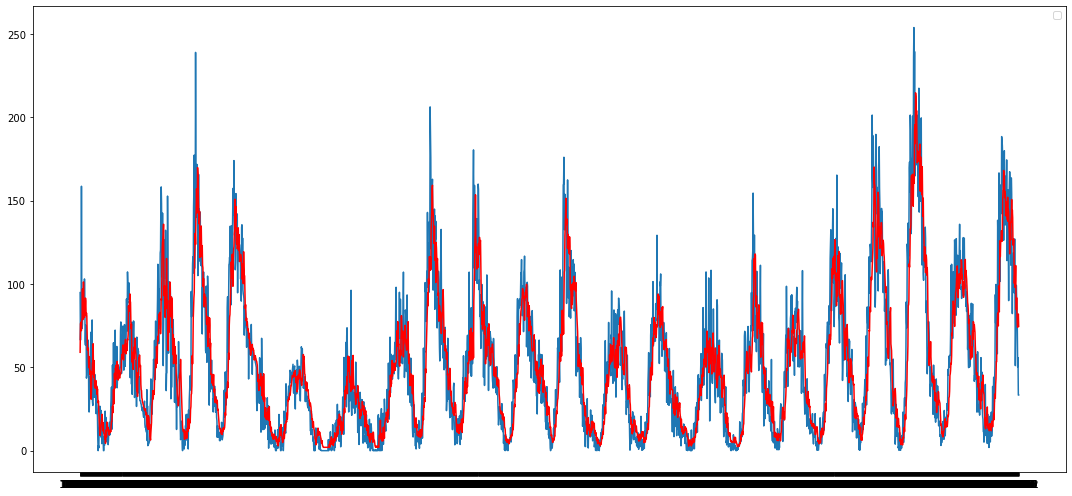

In [19]:
# Plot the predictions and the actual values
plt.plot(dates[6:],values[6:])
plt.plot(dates[6:], preds, color = 'red')
plt.rcParams["figure.figsize"] = (15, 7)
plt.tight_layout()
plt.show()